In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as web


In [210]:
#read data
amzn = pd.read_csv('./data/amzn.us.csv')
grpn = pd.read_csv('./data/grpn.us.csv')
ibm = pd.read_csv('./data/ibm.us.csv')
tsla = pd.read_csv('./data/tsla.us.csv')

In [263]:
for stock in [grpn, amzn, ibm, tsla]:
    stock['EMA_12'] = stock['Close'].ewm(span=12,min_periods=0,adjust=True,ignore_na=False).mean()
    stock['EMA_26'] = stock['Close'].ewm(span=26,min_periods=0,adjust=True,ignore_na=False).mean()
    stock['MACD'] = stock['EMA_12'] - stock['EMA_26']
    stock['signal'] = stock['MACD'].ewm(span=9,min_periods=0,adjust=True,ignore_na=False).mean()
    stock['SMA'] = stock['Close'].rolling(30).mean()

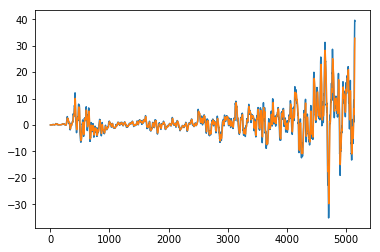

In [212]:
plt.figure()
plt.plot(amzn['MACD'])
plt.plot(amzn['signal'])

In [264]:
def buy_all(stock_name , stock, asset, i):
    #convert money into stock
    price = stock['Close'][i]
    num_stock = np.floor(asset['Money']/price)
    asset['Money'] -= num_stock * price
    asset[stock_name] += num_stock
    
def sell_all(stock_name , stock, asset,i ):
    #convert money into stock
    price = stock['Close'][i]
    num_stock = asset[stock_name]
    asset['Money'] += num_stock * price
    asset[stock_name] = 0


stock = tsla
name = 'tsla'
asset = {}

asset['Money'] = 10000.0
asset[name] = 0
print('Money before:', asset['Money'])

for i in range(len(stock['MACD']) - 601 ,len(stock['MACD'])):
    if i == len(stock['MACD']) - 1:
        sell_all(name, stock, asset, i)
        break
    if stock['signal'][i-1] <= stock['MACD'][i-1]  and stock['signal'][i] >= stock['MACD'][i]:
#         print('sell at', stock['Close'][i], 'amount: ', asset[name])
#         print('MACD - signal= ', stock['MACD'][i] - stock['signal'][i])        
        sell_all(name, stock, asset, i)
        
    if stock['signal'][i-1] >= stock['MACD'][i-1] and stock['signal'][i] <= stock['MACD'][i]:
        buy_all(name, stock, asset, i)
#         print('buy at', stock['Close'][i], 'amount: ', asset[name])
#         print('MACD - signal= ', stock['MACD'][i] - stock['signal'][i])
        
        
print('Money after MACD:', asset['Money'])

Money before: 10000.0
Money after MACD: 16646.886


In [227]:
asset = {}
name = 'grpn'
stock = grpn
asset['Money'] = 10000
asset[name] = 0

print('Money before:', asset['Money'])

buy_all(name, stock, asset, len(stock['Close']) - 601)
sell_all(name, stock, asset, len(stock['Close']) - 1)

print('Money after:', asset['Money'])

Money before: 10000
Money after: 10346.68


In [201]:
asset = {}
asset['Money'] = 10000.0
asset['amzn'] = 0
asset['grpn'] = 0

print('Money before:', asset['Money'])
stock = 
name = 'amzn'

for i in range(1,len(stock['SMA'])):
    if i == len(stock['SMA']) - 1:
        sell_all(name, stock, asset, i)
        break
    if stock['SMA'][i-1] >= stock['Close'][i-1] and stock['SMA'][i] <= stock['Close'][i]:
        sell_all(name, stock, asset, i)
     
    if stock['SMA'][i-1] <= stock['Close'][i-1] and stock['SMA'][i] >= stock['Close'][i]:
        buy_all(name, stock, asset, i)
        
        
print('Money after SMA:', asset['Money'])

SyntaxError: invalid syntax (<ipython-input-201-0626a4103a83>, line 8)